In [55]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random


In [63]:
X_train = np.loadtxt("input.csv",delimiter = ",")
Y_train = np.loadtxt("labels.csv",delimiter = ",")
X_test =np.loadtxt("input_test.csv",delimiter = ",")
Y_test =np.loadtxt("labels_test.csv",delimiter = ",")

In [64]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)


In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [65]:
print("Shape of X Train:",X_train.shape)
print("Shape of Y Train:",Y_train.shape)
print("Shape of X Test:",X_test.shape)
print("Shape of Y Test:",Y_test.shape)

Shape of X Train: (2000, 100, 100, 3)
Shape of Y Train: (2000, 1)
Shape of X Test: (400, 100, 100, 3)
Shape of Y Test: (400, 1)


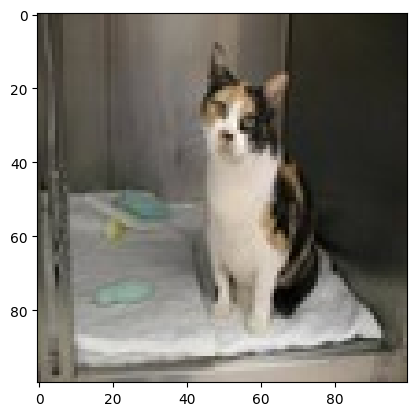

In [66]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [67]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1,activation = 'sigmoid'),
    
])

In [68]:
model.compile(loss ='binary_crossentropy',optimizer = 'adam',metrics =['accuracy'])

In [69]:
model.fit(X_train,Y_train,epochs = 10,batch_size = 64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.4880 - loss: 0.8125
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.5451 - loss: 0.6736
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.6544 - loss: 0.6288
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.6989 - loss: 0.5761
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7140 - loss: 0.5519
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.7432 - loss: 0.5009
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.7944 - loss: 0.4314
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.8302 - loss: 0.3665
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.8645 - loss: 0.3126
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9076 - loss: 0.2353


In [70]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6806 - loss: 0.6725


[0.7039148807525635, 0.6474999785423279]

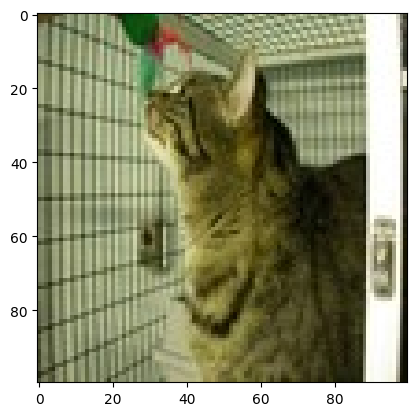

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Model says it is a: cat


In [71]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred >0.5

if(y_pred == 0):
    pred = "dog"
else:
    pred = "cat"

print("Model says it is a:",pred)